# Filtering joins

```python

###########
# semi-join

# Step 1 - semi-join
genres_tracks = genres.merge(top_tracks, on='gid')

# Step 2 - semi-join
genres['gid'].isin(genres_tracks['gid'])

# Step 3 - semi-join
genres_tracks = genres.merge(top_tracks, on='gid')
top_genres = genres[genres['gid'].isin(genres_tracks['gid'])]

###########
# anti-join

# Step 1 - anti-join
genres_tracks = genres.merge(top_tracks, on='gid', how='left', indicator=True)

# Step 2 - anti-join
gid_list = genres_tracks.loc[genres_tracks['_merge'] == 'left_only', 'gid']

# Step 3 - anti-join
genres_tracks = genres.merge(top_tracks, on='gid', how='left', indicator=True)
gid_list = genres_tracks.loc[genres_tracks['_merge'] == 'left_only','gid']
non_top_genres = genres[genres['gid'].isin(gid_list)]

```

[Performing an anti-join | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/advanced-merging-and-concatenating?ex=3)

> ## Performing an anti-join
> 
> In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are **not** assigned to a customer. The results should resemble the results of an anti-join. The company's leadership will assign these employees additional training so that they can work with high valued customers.
> 
> The `top_cust` and `employees` tables have been provided for you.

### init

In [1]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(top_cust , employees)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'employees.csv': 'https://file.io/3GYfiihgJWgh',
  'top_cust.csv': 'https://file.io/W98RbvDoM4N4'}}
"""
prefixToc='1.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
top_cust = pd.read_csv(prefix+'top_cust.csv',index_col=0)
employees = pd.read_csv(prefix+'employees.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'employees.csv': 'https://file.io/3GYfiihgJWgh', 'top_cust.csv': 'https://file.io/W98RbvDoM4N4'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   573    0   573    0     0   1097      0 --:--:-- --:--:-- --:--:--  1097

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3976    0  3976    0     0   7796      0 --:--:-- --:--:-- --:--:--  7780



### code


In [2]:
top_cust.head()

,cid,srid,fname,lname,phone,fax,email
0,1,3,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br
1,2,5,Leonie,Köhler,+49 0711 2842222,NaN,leonekohler@surfeu.de
2,3,3,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com
3,4,4,Bjørn,Hansen,+47 22 44 22 22,NaN,bjorn.hansen@yahoo.no
4,5,4,František,Wichterlová,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com


In [3]:
employees.head()

,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2003-05-03,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2003-10-17,steve@chinookcorp.com


> Merge `employees` and `top_cust` with a left join, setting `indicator` argument to `True`. Save the result to `empl_cust`.

In [4]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                            how='left', indicator=True)

In [5]:
empl_cust.head()

,srid,lname_x,fname_x,title,hire_date,email_x,cid,fname_y,lname_y,phone,fax,email_y,_merge
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,1.0,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,both
3,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,3.0,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com,both
4,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,12.0,Roberto,Almeida,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,both


> Select the `srid` column of `empl_cust` and the rows where `_merge` is `'left_only'`. Save the result to `srid_list`.

In [6]:
# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge']=='left_only', 'srid']

In [7]:
srid_list.head()

0     1
1     2
61    6
62    7
63    8
Name: srid, dtype: int64

> Subset the `employees` table and select those rows where the `srid` is in the variable `srid_list` and print the results.

In [8]:
# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

   srid     lname    fname            title   hire_date  \
0     1     Adams   Andrew  General Manager  2002-08-14   
1     2   Edwards    Nancy    Sales Manager  2002-05-01   
5     6  Mitchell  Michael       IT Manager  2003-10-17   
6     7      King   Robert         IT Staff  2004-01-02   
7     8  Callahan    Laura         IT Staff  2004-03-04   

                     email  
0   andrew@chinookcorp.com  
1    nancy@chinookcorp.com  
5  michael@chinookcorp.com  
6   robert@chinookcorp.com  
7    laura@chinookcorp.com  


[Performing a semi-join | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/advanced-merging-and-concatenating?ex=4)

> ## Performing a semi-join
> 
> Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi-join to find the top revenue-generating non-musical tracks..
> 
> The tables `non_mus_tcks`, `top_invoices`, and `genres` have been loaded for you.

### init

In [9]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(non_mus_tcks, top_invoices,  genres)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'genres.csv': 'https://file.io/SKfXT86kJ8QS',
  'non_mus_tcks.csv': 'https://file.io/Sh3wqKY1AKFw',
  'top_invoices.csv': 'https://file.io/qLPcRuVMtqJX'}}
"""
prefixToc='1.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
non_mus_tcks = pd.read_csv(prefix+'non_mus_tcks.csv',index_col=0)
top_invoices = pd.read_csv(prefix+'top_invoices.csv',index_col=0)
genres = pd.read_csv(prefix+'genres.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'genres.csv': 'https://file.io/SKfXT86kJ8QS', 'non_mus_tcks.csv': 'https://file.io/Sh3wqKY1AKFw', 'top_invoices.csv': 'https://file.io/qLPcRuVMtqJX'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   390    0   390    0     0    783      0 --:--:-- --:--:-- --:--:--   783

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8310    0  8310    0     0  16488      0 --:--:-- --:--:-- --:--:-- 16455

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   428    0   428    0     0    852      0 --:--:-- --:--:-- --:--:--   852



### code

> -   Merge `non_mus_tcks` and `top_invoices` on `tid` using an inner join. Save the result as `tracks_invoices`.
> -   Use `.isin()` to subset the rows of `non_mus_tck` where `tid` is in the `tid` column of `tracks_invoices`. Save the result as `top_tracks`.
> -   Group `top_tracks` by `gid` and count the `tid` rows. Save the result to `cnt_by_gid`.
> -   Merge `cnt_by_gid` with the `genres` table on `gid` and print the result.

In [10]:
# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on='gid'))

   gid  tid      name
0   19    4  TV Shows
1   21    2     Drama
2   22    1    Comedy


# Concatenate DataFrames together vertically

```python
# Basic concatenation
pd.concat([inv_jan, inv_feb, inv_mar])

# Ignoring the index
pd.concat([inv_jan, inv_feb, inv_mar],
ignore_index=True)

# Setting labels to original tables
pd.concat([inv_jan, inv_feb, inv_mar],
ignore_index=False,
keys=['jan','feb','mar'])

# Concatenate tables with different column names
pd.concat([inv_jan, inv_feb],
sort=True)

# Concatenate tables with different column names
pd.concat([inv_jan, inv_feb],
join='inner')

# Append the tables
inv_jan.append([inv_feb, inv_mar],
ignore_index=True, 
sort=True)
```

[Concatenation basics | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/advanced-merging-and-concatenating?ex=6)

> ## Concatenation basics
> 
> You have been given a few tables of data with musical track info for different albums from the metal band, _Metallica_. The track info comes from their _Ride The Lightning_, _Master Of Puppets_, and _St. Anger_ albums. Try various features of the `.concat()` method by concatenating the tables vertically together in different ways.
> 
> The tables `tracks_master`, `tracks_ride`, and `tracks_st` have loaded for you.

### init

In [11]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(tracks_master, tracks_ride,  tracks_st)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'tracks_master.csv': 'https://file.io/gBCewSuKVquI',
  'tracks_ride.csv': 'https://file.io/KaF0xmp8fZjj',
  'tracks_st.csv': 'https://file.io/07iFO0AuGwRP'}}
"""
prefixToc='2.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
tracks_master = pd.read_csv(prefix+'tracks_master.csv',index_col=0)
tracks_ride = pd.read_csv(prefix+'tracks_ride.csv',index_col=0)
tracks_st = pd.read_csv(prefix+'tracks_st.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'tracks_master.csv': 'https://file.io/gBCewSuKVquI', 'tracks_ride.csv': 'https://file.io/KaF0xmp8fZjj', 'tracks_st.csv': 'https://file.io/07iFO0AuGwRP'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   194    0   194    0     0    313      0 --:--:-- --:--:-- --:--:--   313

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   227    0   227    0     0    437      0 --:--:-- --:--:-- --:--:--   437

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   197    0   197    0     0    420      0 --:--:-- --:--:-- --:--:--   420



### code

> Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, in that order, setting `sort` to `True`.

In [12]:
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               sort=True)
print(tracks_from_albums)

   aid             composer  gid  mtid                     name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3     1                  Battery  1853     0.99
1  152            K.Hammett    3     1        Master Of Puppets  1854     0.99
4  152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857     0.99
0  154                  NaN    3     1     Fight Fire With Fire  1874     0.99
1  154                  NaN    3     1       Ride The Lightning  1875     0.99
2  154                  NaN    3     1  For Whom The Bell Tolls  1876     0.99
3  154                  NaN    3     1            Fade To Black  1877     0.99
4  154                  NaN    3     1        Trapped Under Ice  1878     0.99
0  155                  NaN    3     1                  Frantic  1882     0.99
1  155                  NaN    3     1                St. Anger  1883     0.99
2  155                  NaN    3     1     Some Kind Of Monster  1884     0.99
3  155                  NaN    3     1             D

> Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, where the index goes from 0 to n-1.

In [13]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               ignore_index=True,
                               sort=True)
print(tracks_from_albums)

    aid             composer  gid  mtid                     name   tid  \
0   152  J.Hetfield/L.Ulrich    3     1                  Battery  1853   
1   152            K.Hammett    3     1        Master Of Puppets  1854   
2   152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857   
3   154                  NaN    3     1     Fight Fire With Fire  1874   
4   154                  NaN    3     1       Ride The Lightning  1875   
5   154                  NaN    3     1  For Whom The Bell Tolls  1876   
6   154                  NaN    3     1            Fade To Black  1877   
7   154                  NaN    3     1        Trapped Under Ice  1878   
8   155                  NaN    3     1                  Frantic  1882   
9   155                  NaN    3     1                St. Anger  1883   
10  155                  NaN    3     1     Some Kind Of Monster  1884   
11  155                  NaN    3     1             Dirty Window  1885   
12  155                  NaN    3     

> Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, showing only columns that are in all tables.

In [14]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               join='inner',
                               sort=True)
print(tracks_from_albums)

   aid  gid  mtid                     name   tid  u_price
0  152    3     1                  Battery  1853     0.99
1  152    3     1        Master Of Puppets  1854     0.99
4  152    3     1        Disposable Heroes  1857     0.99
0  154    3     1     Fight Fire With Fire  1874     0.99
1  154    3     1       Ride The Lightning  1875     0.99
2  154    3     1  For Whom The Bell Tolls  1876     0.99
3  154    3     1            Fade To Black  1877     0.99
4  154    3     1        Trapped Under Ice  1878     0.99
0  155    3     1                  Frantic  1882     0.99
1  155    3     1                St. Anger  1883     0.99
2  155    3     1     Some Kind Of Monster  1884     0.99
3  155    3     1             Dirty Window  1885     0.99
4  155    3     1            Invisible Kid  1886     0.99


[Concatenating with keys | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/advanced-merging-and-concatenating?ex=7)

> ## Concatenating with keys
> 
> The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named `inv_jul`, `inv_aug`, and `inv_sep`. Concatenate these tables into one to create a graph of the average monthly invoice total.

### init

In [15]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(inv_jul, inv_aug,  inv_sep)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'inv_aug.csv': 'https://file.io/5aLhWckpbXZd',
  'inv_jul.csv': 'https://file.io/P0aK1YKUzO4T',
  'inv_sep.csv': 'https://file.io/8L6hwKGRbFok'}}
"""
prefixToc='2.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
inv_jul = pd.read_csv(prefix+'inv_jul.csv',index_col=0)
inv_aug = pd.read_csv(prefix+'inv_aug.csv',index_col=0)
inv_sep = pd.read_csv(prefix+'inv_sep.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'inv_aug.csv': 'https://file.io/5aLhWckpbXZd', 'inv_jul.csv': 'https://file.io/P0aK1YKUzO4T', 'inv_sep.csv': 'https://file.io/8L6hwKGRbFok'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1173    0  1173    0     0   2350      0 --:--:-- --:--:-- --:--:--  2350

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1171    0  1171    0     0   2300      0 --:--:-- --:--:-- --:--:--  2296

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1095    0  1095    0     0   2147      0 --:--:-- --:--:-- --:--:--  2147



### code

> -   Concatenate the three tables together vertically in order with the oldest month first, adding `'7Jul'`, `'8Aug'`, and `'9Sep'` as `keys` for their respective months, and save to variable `avg_inv_by_month`.
> -   Use the `.agg()` method to find the average of the `total` column from the grouped invoices.
> -   Create a bar chart of `avg_inv_by_month`.

In [16]:
import matplotlib.pyplot as plt

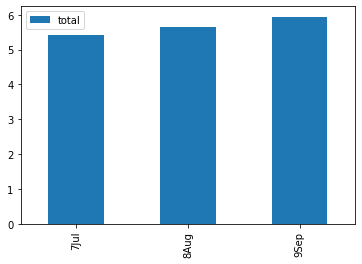

In [18]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=['7Jul','8Aug','9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()

[Using the append method | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/advanced-merging-and-concatenating?ex=8)

> ## Using the append method
> 
> The `.concat()` method is excellent when you need a lot of control over how concatenation is performed. However, if you do not need as much control, then the `.append()` method is another option. You'll try this method out by appending the track lists together from different _Metallica_ albums. From there, you will merge it with the `invoice_items` table to determine which track sold the most.
> 
> The tables `tracks_master`, `tracks_ride`, `tracks_st`, and `invoice_items` have loaded for you.

### init

In [19]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(tracks_master, tracks_ride, tracks_st,  invoice_items)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'invoice_items.csv': 'https://file.io/eBFVLaQR0fq8',
  'tracks_master.csv': 'https://file.io/NX4cuEFUPuvt',
  'tracks_ride.csv': 'https://file.io/F0UaZqOHOgb9',
  'tracks_st.csv': 'https://file.io/VQhpUCVYxBSg'}}
"""
prefixToc='2.3'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
tracks_master = pd.read_csv(prefix+'tracks_master.csv',index_col=0)
tracks_ride = pd.read_csv(prefix+'tracks_ride.csv',index_col=0)
tracks_st = pd.read_csv(prefix+'tracks_st.csv',index_col=0)
invoice_items = pd.read_csv(prefix+'invoice_items.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'invoice_items.csv': 'https://file.io/eBFVLaQR0fq8', 'tracks_master.csv': 'https://file.io/NX4cuEFUPuvt', 'tracks_ride.csv': 'https://file.io/F0UaZqOHOgb9', 'tracks_st.csv': 'https://file.io/VQhpUCVYxBSg'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 54742    0 54742    0     0  79451      0 --:--:-- --:--:-- --:--:-- 79336

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   194    0   194    0     0    386      0 --:--:-- --:--:-- --:--:--   385

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   227    0   227    0     0    459      0 --:--:-- --:--:-- --:--:--   459

  % Total    % Receiv

### code

> -   Use the `.append()` method to combine (**in this order**)`tracks_ride`, `tracks_master`, and `tracks_st` together vertically, and save to `metallica_tracks`.
> -   Merge `metallica_tracks` and `invoice_items` on `tid` with an inner join, and save to `tracks_invoices`.
> -   For each `tid` and `name` in `tracks_invoices`, sum the quantity sold column, and save as `tracks_sold`.
> -   Sort `tracks_sold` in descending order by the `quantity` column, and print the table.

In [24]:
# Use the .append() method to combine the tracks tables
metallica_tracks = tracks_ride.append([tracks_master, tracks_st], sort=False)

# Merge metallica_tracks and invoice_items
tracks_invoices = metallica_tracks.merge(invoice_items, on='tid')

# For each tid and name sum the quantity sold
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({'quantity': 'sum'})

# Sort in decending order by quantity and print the results
print(tracks_sold.sort_values('quantity', ascending=False))

                              quantity
tid  name                             
1853 Battery                         2
1876 For Whom The Bell Tolls         2
1854 Master Of Puppets               1
1857 Disposable Heroes               1
1875 Ride The Lightning              1
1877 Fade To Black                   1
1882 Frantic                         1
1884 Some Kind Of Monster            1
1886 Invisible Kid                   1


# Verifying integrity

```python

# Validating merges
.merge(validate=None) :
Checks if merge is of specified type
'one_to_one'
'one_to_many'
'many_to_one'
'many_to_many'

# Merge validate: one_to_one
tracks.merge(specs, on='tid',
validate='one_to_one')

# Merge validate: one_to_many
albums.merge(tracks, on='aid',
validate='one_to_many')

# Verifying concatenations
.concat(verify_integrity=False) :
Check whether the new concatenated index contains duplicates
Default value is False

```

[Validating a merge | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/advanced-merging-and-concatenating?ex=10)

> ## Validating a merge
> 
> You have been given 2 tables, `artists`, and `albums`. Use the console to merge them using `artists.merge(albums, on='artid').head()`. Adjust the `validate` argument to answer which statement is **_False_**.

### init

In [25]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(artists,  albums)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'albums.csv': 'https://file.io/exJLo2zqORXn',
  'artists.csv': 'https://file.io/7WG1q5Ns5QAN'}}
"""
prefixToc='3.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
artists = pd.read_csv(prefix+'artists.csv',index_col=0)
albums = pd.read_csv(prefix+'albums.csv',index_col=0)



Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'albums.csv': 'https://file.io/exJLo2zqORXn', 'artists.csv': 'https://file.io/7WG1q5Ns5QAN'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12088    0 12088    0     0  21022      0 --:--:-- --:--:-- --:--:-- 21022

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8004    0  8004    0     0  15632      0 --:--:-- --:--:-- --:--:-- 15602



### code

In [26]:
artists.head()

,artid,name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


In [27]:
albums.head()

,aid,title,artid
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In [31]:
artists.merge(albums, on='artid', validate='many_to_many').head()

,artid,name,aid,title
0,1,AC/DC,1,For Those About To Rock We Salute You
1,1,AC/DC,4,Let There Be Rock
2,2,Accept,2,Balls to the Wall
3,2,Accept,3,Restless and Wild
4,3,Aerosmith,5,Big Ones


In [32]:
artists.merge(albums, on='artid', validate='one_to_many').head()

,artid,name,aid,title
0,1,AC/DC,1,For Those About To Rock We Salute You
1,1,AC/DC,4,Let There Be Rock
2,2,Accept,2,Balls to the Wall
3,2,Accept,3,Restless and Wild
4,3,Aerosmith,5,Big Ones


In [33]:
artists.merge(albums, on='artid', validate='one_to_one').head()

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

In [34]:
artists.merge(albums, on='artid', validate='many_to_one').head()

MergeError: Merge keys are not unique in right dataset; not a many-to-one merge

[Concatenate and merge to find common songs | Python](https://campus.datacamp.com/courses/joining-data-with-pandas/advanced-merging-and-concatenating?ex=11)

> ## Concatenate and merge to find common songs
> 
> The senior leadership of the streaming service is requesting your help again. You are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, you are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a semi-join to return only the most popular classical music tracks.
> 
> The tables `classic_18`, `classic_19`, and `pop_18`, `pop_19` have been loaded for you. Additionally, `pandas` has been loaded as `pd`.

### init

In [35]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(classic_18, classic_19,  pop_18, pop_19)

"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'classic_18.csv': 'https://file.io/dkqZ5rHa54aK',
  'classic_19.csv': 'https://file.io/LGV3mXfrbcmU',
  'pop_18.csv': 'https://file.io/vcgEfg9HCyoL',
  'pop_19.csv': 'https://file.io/jnb93DKcctES'}}
"""
prefixToc='3.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
classic_18 = pd.read_csv(prefix+'classic_18.csv',index_col=0)
classic_19 = pd.read_csv(prefix+'classic_19.csv',index_col=0)
pop_18 = pd.read_csv(prefix+'pop_18.csv',index_col=0)
pop_19 = pd.read_csv(prefix+'pop_19.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'classic_18.csv': 'https://file.io/dkqZ5rHa54aK', 'classic_19.csv': 'https://file.io/LGV3mXfrbcmU', 'pop_18.csv': 'https://file.io/vcgEfg9HCyoL', 'pop_19.csv': 'https://file.io/jnb93DKcctES'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   334    0   334    0     0    647      0 --:--:-- --:--:-- --:--:--   646

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   360    0   360    0     0    693      0 --:--:-- --:--:-- --:--:--   692

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2014    0  2014    0     0   3248      0 --:--:-- --:--:-- --:--:--  3248

  % Total    % Received % Xferd  Av

### code

> -   Concatenate the `classic_18` and `classic_19` tables vertically where the index goes from 0 to n-1, and save to `classic_18_19`.
> -   Concatenate the `pop_18` and `pop_19` tables vertically where the index goes from 0 to n-1, and save to `pop_18_19`.

In [39]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

> -   With `classic_18_19` on the left, merge it with `pop_18_19` on `tid` using an inner join.
> -   Use `.isin()` to filter `classic_18_19` where `tid` is in `classic_pop`.

In [41]:
# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on='tid')

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

# Print popular chart
print(popular_classic)

    pid   tid
3    12  3479
10   12  3439
21   12  3445
23   12  3449
48   12  3437
50   12  3435
